# getting setup

In [2]:
#! pip install torch torchvision torchaudio

     |████████████████████████████████| 108.9 MB 97 kB/s  eta 0:00:011   |███▎                            | 11.3 MB 9.4 MB/s eta 0:00:11     |████▊                           | 16.3 MB 12.7 MB/s eta 0:00:08     |███████                         | 23.5 MB 12.7 MB/s eta 0:00:07     |███████████▏                    | 38.2 MB 968 kB/s eta 0:01:14     |████████████▌                   | 42.4 MB 968 kB/s eta 0:01:09     |████████████▌                   | 42.7 MB 968 kB/s eta 0:01:09     |███████████████▊                | 53.7 MB 8.5 MB/s eta 0:00:07     |███████████████████████████████ | 105.2 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 9.8 MB/s eta 0:00:01


In [7]:
# ! curl https://download.pytorch.org/tutorial/hymenoptera_data.zip --output hymenoptera_data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.0M  100 45.0M    0     0  6415k      0  0:00:07  0:00:07 --:--:-- 7285k


In [8]:
# ! unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

  inflating: hymenoptera_data/train/ants/Nepenthes_rafflesiana_ant.jpg  
  inflating: hymenoptera_data/train/ants/swiss-army-ant.jpg  
  inflating: hymenoptera_data/train/ants/termite-vs-ant.jpg  
  inflating: hymenoptera_data/train/ants/trap-jaw-ant-insect-bg.jpg  
  inflating: hymenoptera_data/train/ants/VietnameseAntMimicSpider.jpg  
   creating: hymenoptera_data/train/bees/
  inflating: hymenoptera_data/train/bees/1092977343_cb42b38d62.jpg  
  inflating: hymenoptera_data/train/bees/1093831624_fb5fbe2308.jpg  
  inflating: hymenoptera_data/train/bees/1097045929_1753d1c765.jpg  
  inflating: hymenoptera_data/train/bees/1232245714_f862fbe385.jpg  
  inflating: hymenoptera_data/train/bees/129236073_0985e91c7d.jpg  
  inflating: hymenoptera_data/train/bees/1295655112_7813f37d21.jpg  
  inflating: hymenoptera_data/train/bees/132511197_0b86ad0fff.jpg  
  inflating: hymenoptera_data/train/bees/132826773_dbbcb117b9.jpg  
  inflating: hymenoptera_data/train/bees/150013791_969d9a968b.jpg  
  

  inflating: hymenoptera_data/val/ants/147542264_79506478c2.jpg  
  inflating: hymenoptera_data/val/ants/152286280_411648ec27.jpg  
  inflating: hymenoptera_data/val/ants/153320619_2aeb5fa0ee.jpg  
  inflating: hymenoptera_data/val/ants/153783656_85f9c3ac70.jpg  
  inflating: hymenoptera_data/val/ants/157401988_d0564a9d02.jpg  
  inflating: hymenoptera_data/val/ants/159515240_d5981e20d1.jpg  
  inflating: hymenoptera_data/val/ants/161076144_124db762d6.jpg  
  inflating: hymenoptera_data/val/ants/161292361_c16e0bf57a.jpg  
  inflating: hymenoptera_data/val/ants/170652283_ecdaff5d1a.jpg  
  inflating: hymenoptera_data/val/ants/17081114_79b9a27724.jpg  
  inflating: hymenoptera_data/val/ants/172772109_d0a8e15fb0.jpg  
  inflating: hymenoptera_data/val/ants/1743840368_b5ccda82b7.jpg  
  inflating: hymenoptera_data/val/ants/181942028_961261ef48.jpg  
  inflating: hymenoptera_data/val/ants/183260961_64ab754c97.jpg  
  inflating: hymenoptera_data/val/ants/2039585088_c6f47c592e.jpg  
  inflati

In [10]:
# ! rm hymenoptera_data.zip

# load stuff

In [4]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [11]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

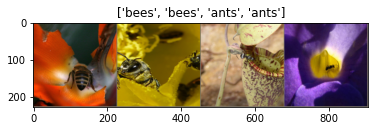

In [12]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [13]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [14]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [35]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

800px-Meat_eater_ant_qeen_excavating_hole.jpg


In [15]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/johnmyslinski/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
model_ft

In [16]:
model_ft = train_model(model_ft, 
                       criterion, 
                       optimizer_ft, 
                       exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.4848 Acc: 0.7459
val Loss: 0.3250 Acc: 0.8497

Epoch 1/24
----------
train Loss: 0.5650 Acc: 0.7746
val Loss: 0.7390 Acc: 0.7843

Epoch 2/24
----------
train Loss: 0.7046 Acc: 0.7541
val Loss: 1.3277 Acc: 0.6013

Epoch 3/24
----------
train Loss: 0.5969 Acc: 0.7828
val Loss: 0.3930 Acc: 0.8693

Epoch 4/24
----------
train Loss: 0.6064 Acc: 0.7705
val Loss: 0.4821 Acc: 0.8301

Epoch 5/24
----------
train Loss: 0.7586 Acc: 0.7213
val Loss: 1.0230 Acc: 0.6928

Epoch 6/24
----------
train Loss: 0.4805 Acc: 0.8156
val Loss: 0.4717 Acc: 0.8301

Epoch 7/24
----------
train Loss: 0.4323 Acc: 0.8033
val Loss: 0.2232 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.3230 Acc: 0.8689
val Loss: 0.2078 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3339 Acc: 0.8689
val Loss: 0.2386 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.3124 Acc: 0.8893
val Loss: 0.2303 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.2757 Acc: 0.8811
val Loss: 0.2228 Acc: 0.9150

Ep

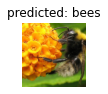

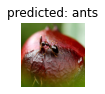

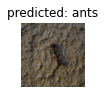

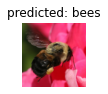

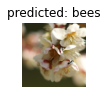

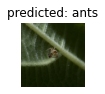

In [17]:
visualize_model(model_ft)

In [18]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [19]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6163 Acc: 0.6475
val Loss: 0.4777 Acc: 0.7712

Epoch 1/24
----------
train Loss: 0.4629 Acc: 0.8033
val Loss: 0.1844 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.4716 Acc: 0.7828
val Loss: 0.3382 Acc: 0.8758

Epoch 3/24
----------
train Loss: 0.4545 Acc: 0.8197
val Loss: 0.2488 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.4839 Acc: 0.7828
val Loss: 0.1824 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.4053 Acc: 0.8156
val Loss: 0.2068 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.3848 Acc: 0.8484
val Loss: 0.3263 Acc: 0.8693

Epoch 7/24
----------
train Loss: 0.3928 Acc: 0.8566
val Loss: 0.2005 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3556 Acc: 0.8361
val Loss: 0.2039 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3895 Acc: 0.8238
val Loss: 0.1880 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.2882 Acc: 0.8566
val Loss: 0.1907 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3298 Acc: 0.8525
val Loss: 0.1901 Acc: 0.9542

Ep

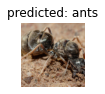

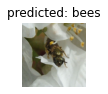

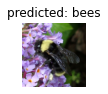

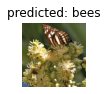

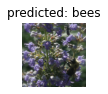

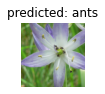

In [20]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [88]:
def pred_new(model, pred_dir, num_images = 2):
    # model stuff
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    # data pre-rocessing
    data_dir = 'hymenoptera_data'
    data_folder = datasets.ImageFolder(
        os.path.join(data_dir,pred_dir),
        data_transforms['val']
    )
    
    data_loader = torch.utils.data.DataLoader(
        data_folder,
        batch_size = 4,
        shuffle = False,
    num_workers = 4
    )
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

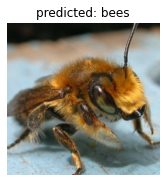

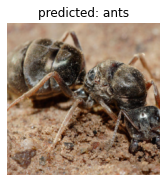

In [89]:
pred_new(model_conv, 'new')